# Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:

df = pd.read_csv('311_Noise_Complaints.csv')


C:\Users\20123\AppData\Local\Temp\ipykernel_202004\307098260.py:1: DtypeWarning: Columns (17,18,20,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Noise_Complaints.csv')


In [10]:
df.head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
2748739,43153862,2020-04-29 14:48:22,04/29/2020 03:04:06 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748740,43153863,2020-04-29 14:48:28,04/29/2020 03:04:11 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2750389,43159049,2020-04-29 14:48:19,04/29/2020 03:04:05 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2750916,43160714,2020-04-29 14:48:26,04/29/2020 03:04:09 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,613 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2750917,43160715,2020-04-29 14:48:29,04/29/2020 03:04:12 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751529,43162462,2020-04-29 14:48:27,04/29/2020 03:04:11 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,2 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751530,43162463,2020-04-29 14:48:25,04/29/2020 03:04:07 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,69 EAST 17 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751532,43162465,2020-04-29 14:48:18,04/29/2020 03:04:04 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751533,43162466,2020-04-29 14:48:12,04/29/2020 03:04:04 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,52 CHAMBERS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752116,43164231,2020-04-29 14:48:21,04/29/2020 03:04:06 PM,NYPD,New York City Police Department,Noise - Park,Loud Talking,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [5]:
# Converteer alle kolomnamen naar kleine letters en vervang spaties door underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert the 'created_date' column to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# Filter data for entries from 2020 onwards
df = df[df['created_date'] >= '2020-01-01']

In [6]:
# Selecting relevant columns
columns_to_keep = ['created_date', 'closed_date', 'agency_name', 'complaint_type', 
                   'descriptor', 'location_type', 'borough', 'city', 'incident_zip']
df_filtered = df[columns_to_keep]

In [7]:
# Check for missing data
print(df_filtered.isnull().sum())

# Drop rows with missing 'created_date' or 'complaint_type'
df_filtered.dropna(subset=['created_date', 'complaint_type'], inplace=True)


created_date           0
closed_date        59392
agency_name            0
complaint_type         0
descriptor             2
location_type     278650
borough               58
city              155176
incident_zip        1569
dtype: int64


C:\Users\20123\AppData\Local\Temp\ipykernel_202004\1182278748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['created_date', 'complaint_type'], inplace=True)


# Pie Chart

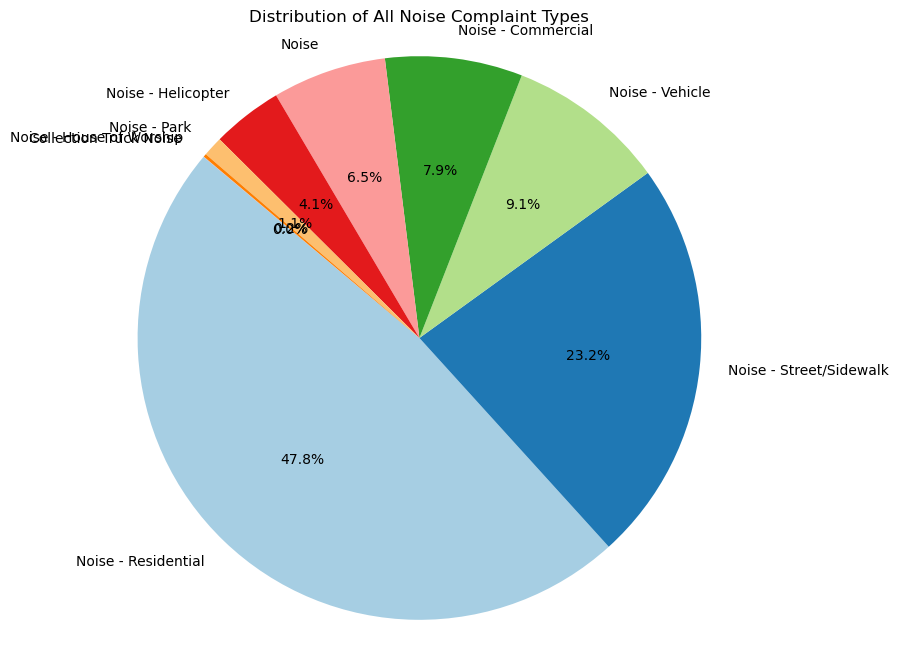

In [8]:
# Count the occurrences of each complaint type
complaint_type_counts = df_filtered['complaint_type'].value_counts()

# Plot the pie chart for all noise complaint types
plt.figure(figsize=(8, 8))
plt.pie(complaint_type_counts, labels=complaint_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of All Noise Complaint Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [9]:
# Fix the SettingWithCopyWarning by using .loc
residential_noise_df.loc[:, 'combined'] = 'Noise - Residential (' + residential_noise_df['descriptor'] + ')'

# Combine the residential noise (with detailed descriptors) with the non-residential noise
non_residential_df = df_filtered[df_filtered['complaint_type'] != 'Noise - Residential']

# Create a new series by combining non-residential complaints and residential noise descriptors
complaint_type_series = pd.concat([non_residential_df['complaint_type'], residential_noise_df['combined']])

# Count occurrences of each complaint type (including detailed residential descriptors)
combined_complaint_counts = complaint_type_series.value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_complaint_counts, labels=combined_complaint_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Noise Complaint Types (Including Residential Descriptors)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

NameError: name 'residential_noise_df' is not defined

# Analyzing Complaint Distribution Over Time

/var/folders/v6/wh3trpys2z7b383cq2m_j__h0000gn/T/ipykernel_69754/4118077524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['created_date'].dt.year
/var/folders/v6/wh3trpys2z7b383cq2m_j__h0000gn/T/ipykernel_69754/4118077524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['created_date'].dt.month


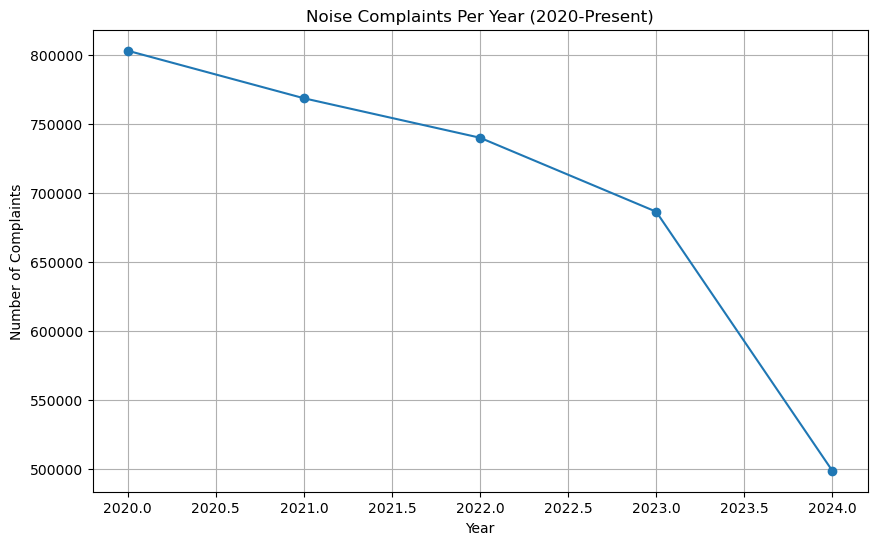

In [9]:
# Extract year and month from the 'created_date' column
df_filtered['year'] = df_filtered['created_date'].dt.year
df_filtered['month'] = df_filtered['created_date'].dt.month

# Count the number of complaints per year
complaints_per_year = df_filtered['year'].value_counts().sort_index()

# Plot complaints over time
plt.figure(figsize=(10, 6))
plt.plot(complaints_per_year.index, complaints_per_year.values, marker='o')
plt.title('Noise Complaints Per Year (2020-Present)')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()

# Analyzing Complaints by Type and Borough

ValueError: Unknown format code 'd' for object of type 'float'

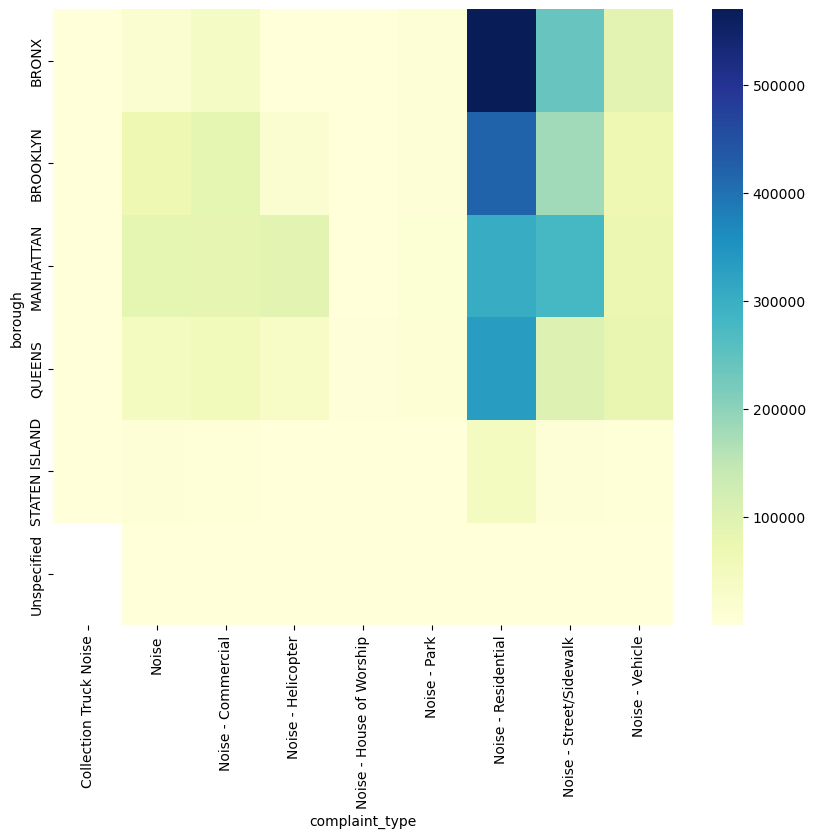

In [10]:
# Count complaint types by borough
complaints_by_borough = df_filtered.groupby(['borough', 'complaint_type']).size().unstack()

# Plot heatmap of complaints by type and borough
plt.figure(figsize=(10, 8))
sns.heatmap(complaints_by_borough, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Noise Complaint Types by Borough')
plt.xlabel('Complaint Type')
plt.ylabel('Borough')
plt.show()

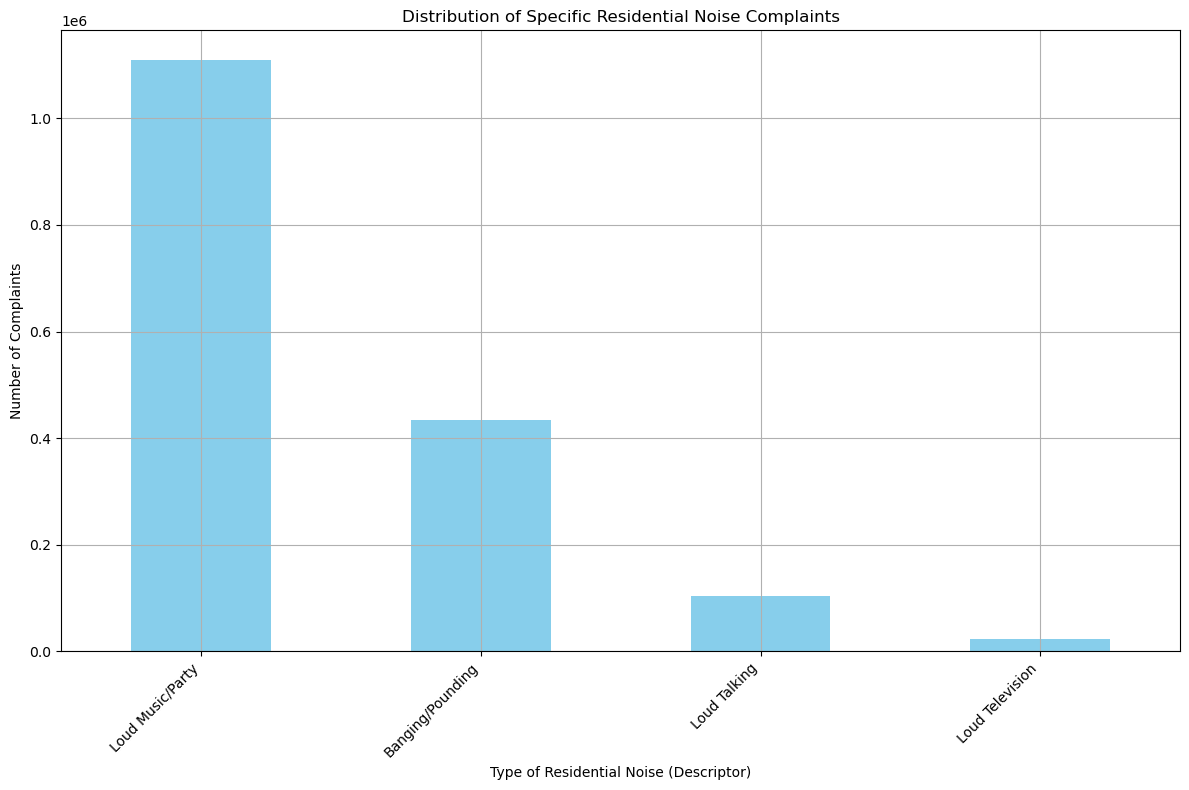

In [14]:
# Filter data for Residential Noise complaints
residential_noise_df = df_filtered[df_filtered['complaint_type'] == 'Noise - Residential']

# Count the occurrences of each descriptor within the residential noise complaints
residential_noise_by_descriptor = residential_noise_df['descriptor'].value_counts()

# Plot the distribution of specific residential noise types
plt.figure(figsize=(12, 8))
residential_noise_by_descriptor.plot(kind='bar', color='skyblue')
plt.title('Distribution of Specific Residential Noise Complaints')
plt.xlabel('Type of Residential Noise (Descriptor)')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


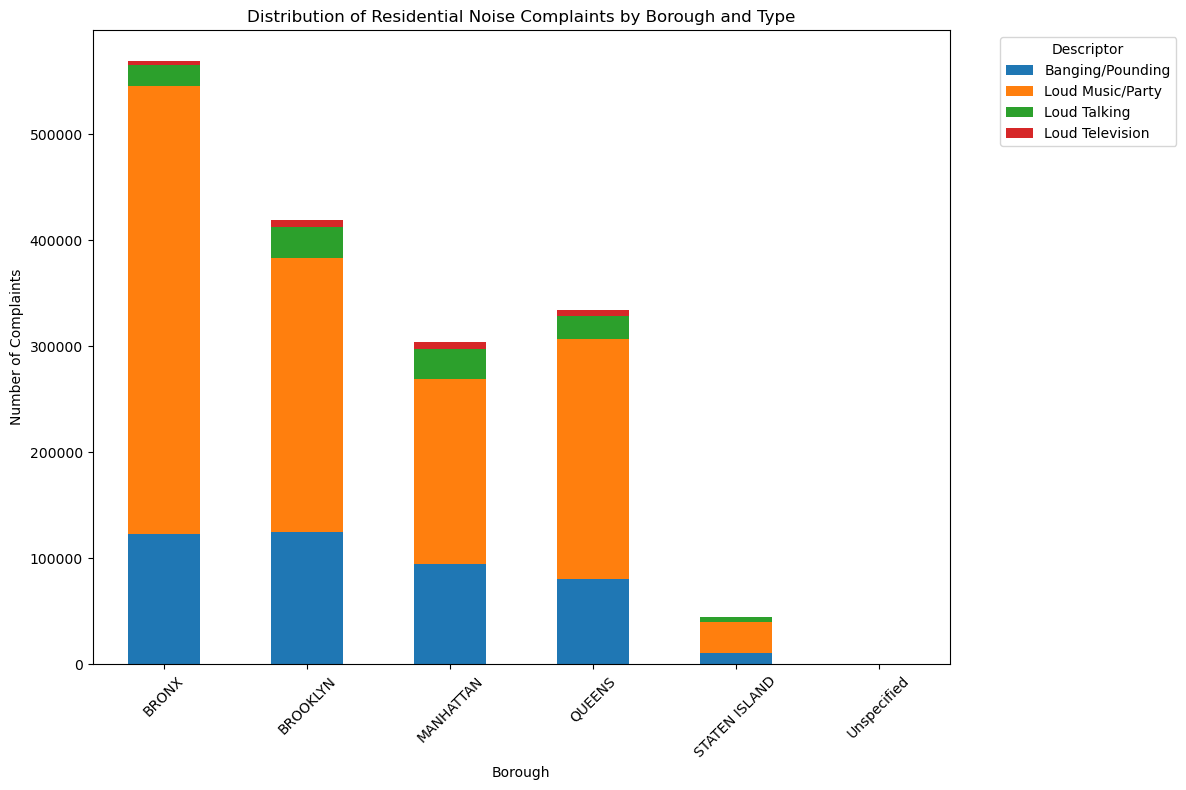

In [15]:
# Filter data for Residential Noise complaints
residential_noise_df = df_filtered[df_filtered['complaint_type'] == 'Noise - Residential']

# Group by borough and descriptor to count occurrences
residential_noise_by_borough_descriptor = residential_noise_df.groupby(['borough', 'descriptor']).size().unstack().fillna(0)

# Plot the data using a stacked bar plot
residential_noise_by_borough_descriptor.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding plot titles and labels
plt.title('Distribution of Residential Noise Complaints by Borough and Type')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Descriptor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Analyzing the Duration of Complaints

/var/folders/v6/wh3trpys2z7b383cq2m_j__h0000gn/T/ipykernel_69754/2990315383.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['closed_date'] = pd.to_datetime(df_filtered['closed_date'], errors='coerce')
/var/folders/v6/wh3trpys2z7b383cq2m_j__h0000gn/T/ipykernel_69754/2990315383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['closed_date'] = pd.to_datetime(df_filtered['closed_date'], errors='coerce')
/var/folders/v6/wh3trpys2z7b383cq2m_j__h0000gn/T/ipykernel_69754/2990315383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

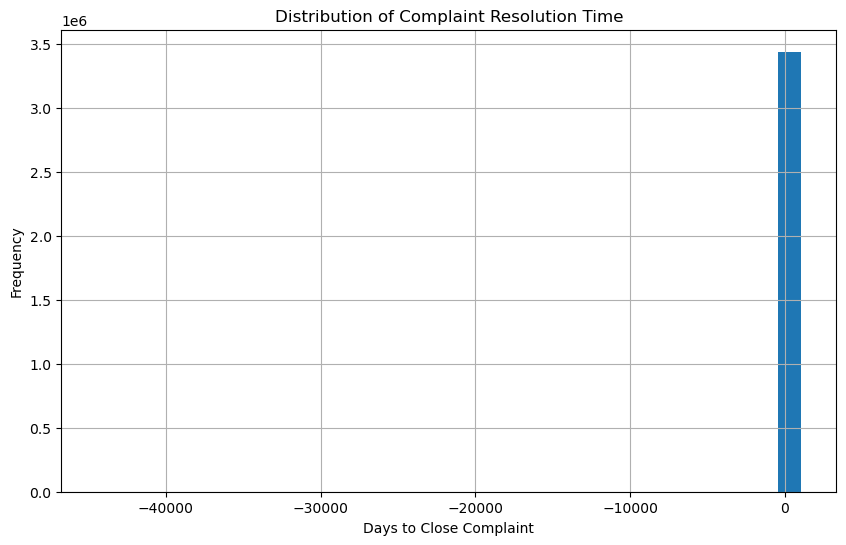

In [11]:
# Calculate the time to resolve complaints
df_filtered['closed_date'] = pd.to_datetime(df_filtered['closed_date'], errors='coerce')
df_filtered['complaint_duration'] = (df_filtered['closed_date'] - df_filtered['created_date']).dt.days

# Plot the distribution of complaint durations
plt.figure(figsize=(10, 6))
df_filtered['complaint_duration'].hist(bins=30)
plt.title('Distribution of Complaint Resolution Time')
plt.xlabel('Days to Close Complaint')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Analyzing Complaint type distribution by month

<Figure size 1200x800 with 0 Axes>

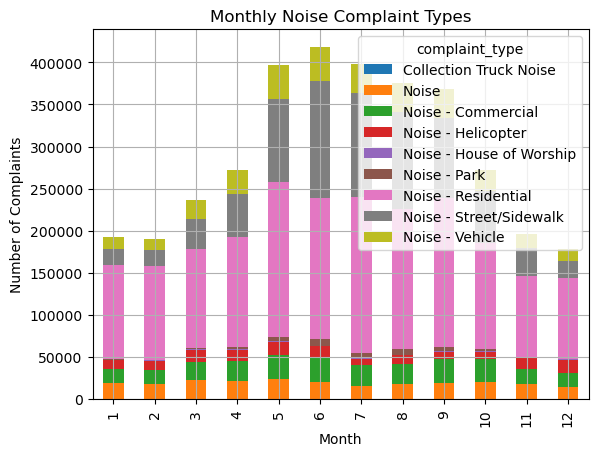

In [13]:
# Grouping by complaint type and month
complaints_by_type_and_month = df_filtered.groupby(['month', 'complaint_type']).size().unstack()

# Plotting complaint type distribution by month
plt.figure(figsize=(12, 8))
complaints_by_type_and_month.plot(kind='bar', stacked=True)
plt.title('Monthly Noise Complaint Types')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()